In [1]:
import json
import pathlib

import matplotlib.ticker
import matplotlib.pylab as plt
import pandas as pd

from hubbardml import keys
from hubbardml import plots
from hubbardml import datasets

import predict_iterations

/tmp/ipykernel_3950309/860506656.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Set the path of the training experiment to use

EXPERIMENT_DIR = pathlib.Path(
    "outputs/predict_iterations/batch_size=64,max_epochs=12000/2023-08-20_21-37-56"
)
# EXPERIMENT_DIR = pathlib.Path(
#     "outputs/predict_iterations/batch_size=32,max_epochs=12000/2023-08-19_15-14-39"
# )
EXPERIMENT_DIR = pathlib.Path(
    "outputs/predict_iterations/batch_size=32,max_epochs=12000/2023-08-21_10-31-28"
)
EXPERIMENT_DIR = pathlib.Path(
    "outputs/predict_iterations/batch_size=16,max_epochs=12000/2023-08-23_10-17-14"
)
EXPERIMENT_DIR = pathlib.Path(
    "outputs/predict_iterations/batch_size=16,max_epochs=12000/2023-08-23_10-17-14"
)
EXPERIMENT_DIR = pathlib.Path(
    "outputs/predict_iterations/batch_size=64,max_epochs=6000/2024-03-06_17-16-05"
)

DATASET = "dataset.json"
RESULTS_FILE = "hubbard_u_iterations.json"

In [3]:
uv_data = pd.read_json(EXPERIMENT_DIR / DATASET)
uv_data

,dir,material,is_vdw,uv_iter,formula,cell,n_atoms_uc,person,structure_index,pw_time_unix,...,atom_2_occs_1,atom_2_occs_2,atom_2_frac_coords,atom_2_starting_mag,atom_2_final_mag,param_delta,species,label,colour,sc_paths
0,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[0.0, 0.0, 0.0]",0.0,0.0000,10.2709,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
64,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[0.5, 0.0, 0.0]",0.0,0.0000,10.2709,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
128,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.801, 0.081, -0.011, -0.007, 0.003], [0.081...","[[0.454, 0.106, -0.003, -0.004, 0.001], [0.106...","[0.25, 0.5, 0.0]",1.0,0.7291,9.6452,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
192,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.454, 0.106, -0.003, -0.004, 0.001], [0.106...","[[0.801, 0.081, -0.011, -0.007, 0.003], [0.081...","[0.75, 0.5, 0.0]",1.0,-0.7291,9.6452,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
256,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.801, 0.081, 0.011, -0.007, -0.003], [0.081...","[[0.454, 0.106, 0.003, -0.004, -0.001], [0.106...","[0.0, 0.0, 0.25]",1.0,0.7290,9.6452,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630851,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,230,1638445240,...,"[[0.28, 0.009000000000000001, 0.01, 0.003, -0....","[[0.618, -0.012, -0.01, -0.008, 0.024], [-0.01...","[0.75, 0.75, 0.5]",0.0,-2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...
631235,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,230,1638445240,...,"[[0.618, 0.012, 0.01, -0.008, 0.024], [0.012, ...","[[0.28, -0.009000000000000001, -0.01, 0.003, -...","[0.5, 0.0, 0.0]",0.0,2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...
631619,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,230,1638445240,...,"[[0.618, 0.012, 0.01, -0.008, 0.024], [0.012, ...","[[0.28, -0.009000000000000001, -0.01, 0.003, -...","[0.0, 0.5, 0.0]",0.0,2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...
632003,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,230,1638445240,...,"[[0.618, -0.01, -0.011, 0.008, 0.024], [-0.01,...","[[0.28, 0.01, 0.009000000000000001, -0.003, -0...","[0.25, 0.75, 0.0]",0.0,2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...


In [4]:
def create_plots(df: pd.DataFrame, logy=False, scale=1.0):
    if predict_iterations.Keys.TRAIN_RMSE in df:
        cols = [predict_iterations.Keys.TRAIN_RMSE, predict_iterations.Keys.MODEL_RMSE,
                predict_iterations.Keys.REF_RMSE]
        series_labels = 'ML (train)', 'ML (validate)', "Reference"
        colours = plots.train_validate_colours[keys.TRAIN], plots.train_validate_colours[keys.VALIDATE], \
        plots.train_validate_colours[keys.REFERENCE],
    else:
        cols = [predict_iterations.Keys.MODEL_RMSE, predict_iterations.Keys.REF_RMSE]
        series_labels = 'ML (validate)', "Reference"
        colours = plots.train_validate_colours[keys.TRAIN], plots.train_validate_colours[keys.REFERENCE],

        # ref_rmse = frame.iloc[0][olivines.Keys.REF_RMSE]  # They are all the same

    fig = plt.figure(figsize=(6 * scale, 4 * scale))
    ax = fig.gca()

    print(df)

    ax = df.plot(
        x=keys.UV_ITER,
        y=cols,
        ax=ax,
        color=colours,
        marker='o',
        linestyle="--",
        logy=logy,
        title="RMSE as function of training iterations",
        ylabel='RMSE (eV)',
        xlabel="$N$, training on all previous linear-response results",
    );

    ax.legend(series_labels)
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    ax.set_ylim([0, 1.25])
    # ax.set_yscale("log")

    return ax

# Data analysis

In [5]:
results_file = EXPERIMENT_DIR / RESULTS_FILE
with open(results_file, 'r') as file:
    hubbard_u_iterations = pd.DataFrame(json.load(file))
hubbard_u_iterations

,uv_iter,model_rmse,train_rmse,ref_rmse
0,2.0,0.984479,0.066259,0.979461
1,3.0,0.181887,0.104649,0.338309
2,4.0,0.215459,0.165348,0.437184
3,5.0,0.106159,0.144614,0.147356
4,6.0,0.122069,0.144530,0.138338
5,7.0,0.095255,0.156174,0.142135
6,8.0,0.080059,0.150561,0.143237
7,9.0,0.007282,0.136083,0.064363
8,10.0,0.032247,0.164881,0.009020


   uv_iter  model_rmse  train_rmse  ref_rmse
0      2.0    0.984479    0.066259  0.979461
1      3.0    0.181887    0.104649  0.338309
2      4.0    0.215459    0.165348  0.437184
3      5.0    0.106159    0.144614  0.147356
4      6.0    0.122069    0.144530  0.138338
5      7.0    0.095255    0.156174  0.142135
6      8.0    0.080059    0.150561  0.143237
7      9.0    0.007282    0.136083  0.064363
8     10.0    0.032247    0.164881  0.009020


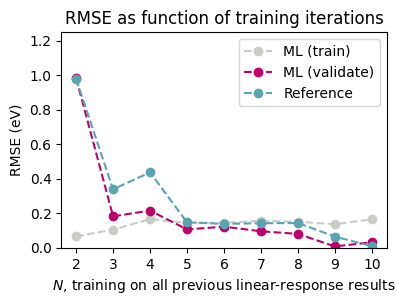

In [6]:
output_dir = EXPERIMENT_DIR
plot_dir = output_dir / "plots"
plot_dir.mkdir(exist_ok=True)

ax = create_plots(hubbard_u_iterations, scale=0.7)
ax.get_figure().savefig(plot_dir / f"iteration_comparison.pdf", bbox_inches='tight')

In [7]:
uv_iter = 2
predictions_frame = pd.read_json(EXPERIMENT_DIR / f"iter={uv_iter}" / DATASET)

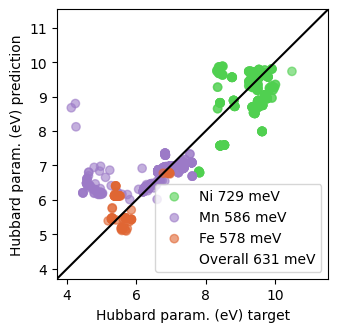

In [8]:
frame = predictions_frame.loc[(predictions_frame[keys.TRAINING_LABEL] != keys.TRAIN)]
plots.split_plot(
    frame,
    keys.LABEL,
    axis_label="Hubbard param. (eV)",
    # title=f"RMSE = {datasets.rmse(frame):.2f} eV",
);

In [9]:
frame[keys.]

SyntaxError: invalid syntax (2677641840.py, line 1)

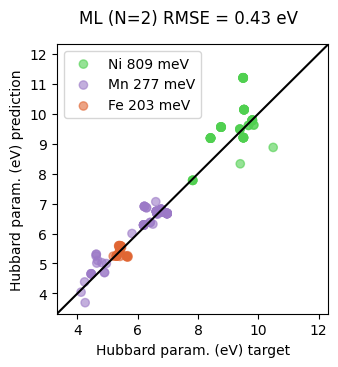

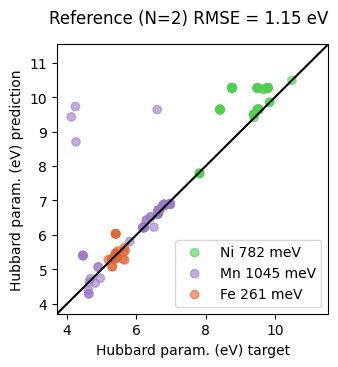

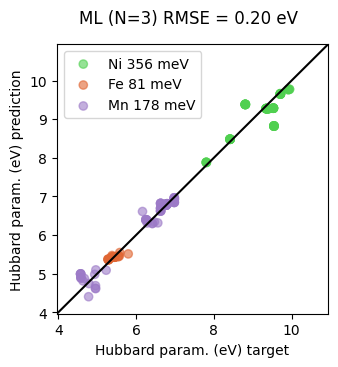

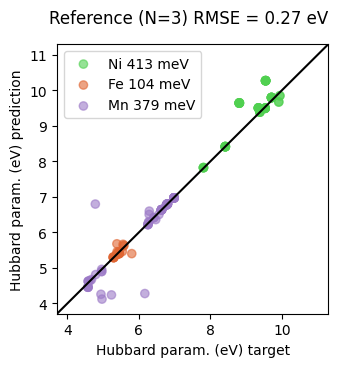

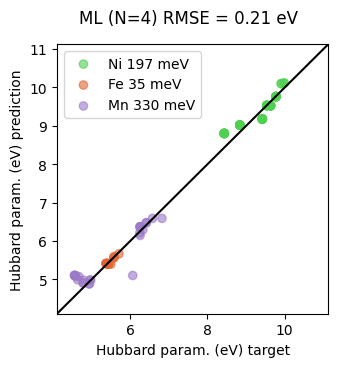

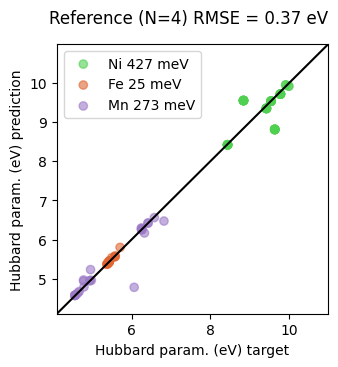

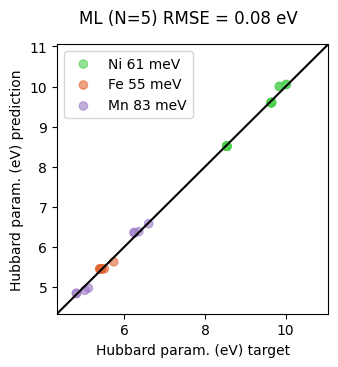

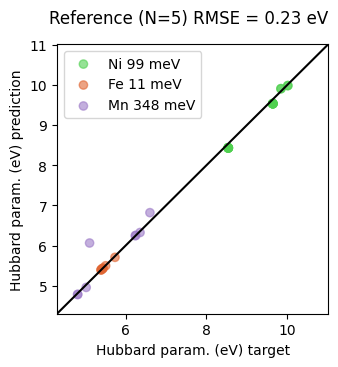

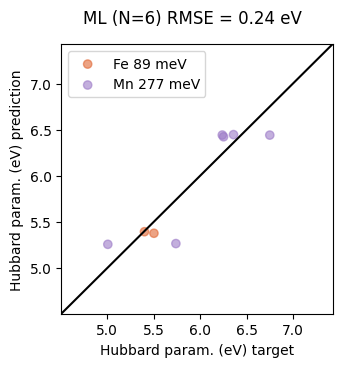

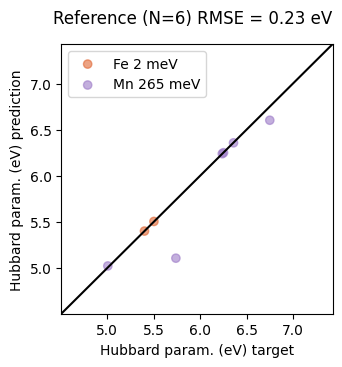

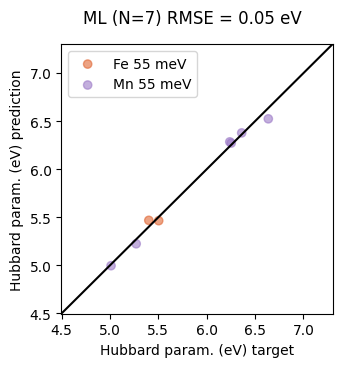

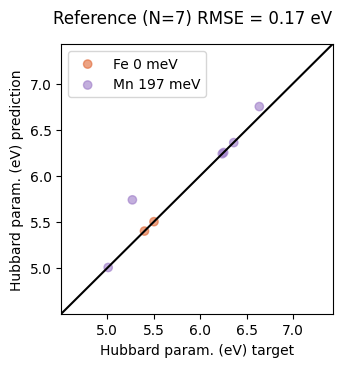

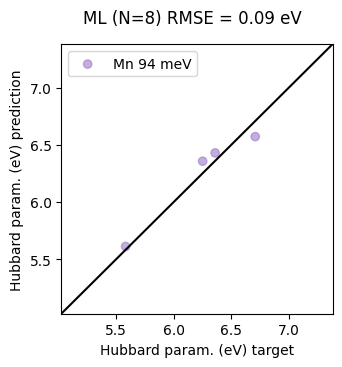

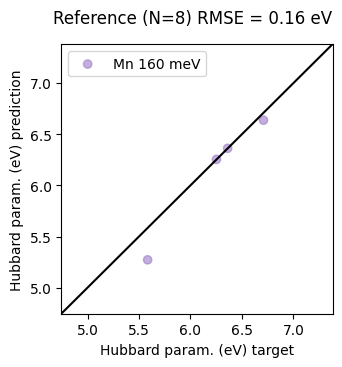

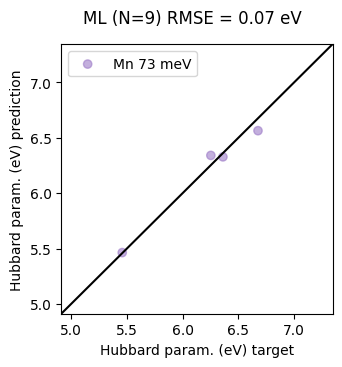

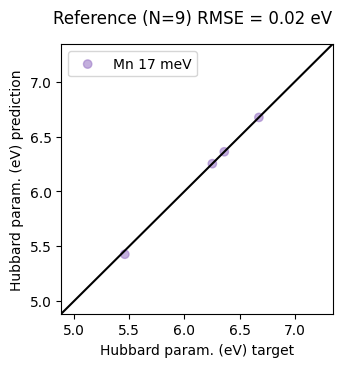

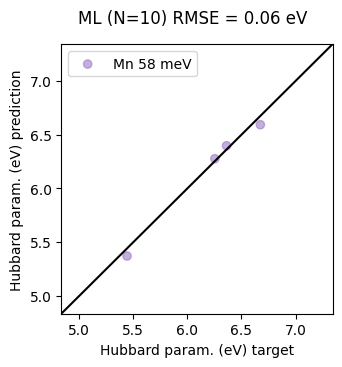

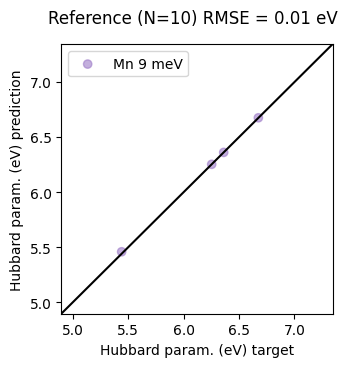

In [ ]:
plot_info = {
    "label": ["ML", "Reference"],
    "key": [keys.PARAM_OUT_PREDICTED, keys.PARAM_IN]
}

for uv_iter in list(sorted(predictions_frame[keys.UV_ITER].unique()))[1:]:
    predictions_frame = pd.read_json(EXPERIMENT_DIR / f"iter={uv_iter}" / DATASET)
    
    for idx in range(len(plot_info["label"])):
        label = plot_info["label"][idx]
        key = plot_info["key"][idx]

        frame = predictions_frame[
            (predictions_frame[keys.TRAINING_LABEL] != keys.TRAIN) &
            (predictions_frame[keys.UV_ITER] == uv_iter)
            ]
        
        # Calculate the overall RMSE
        rmse = datasets.rmse(frame, prediction_key=key)

        # Parity plot split by element
        fig = plots.split_plot(
            frame,
            keys.LABEL,
            axis_label="Hubbard param. (eV)",
            title=f"{label} (N={uv_iter}) RMSE = {rmse:.2f} eV",
            prediction_key=key
        )

        fig.savefig(plot_dir / f"uv_iter={uv_iter}_{label}.pdf", bbox_inches='tight')
